<h1> generate Nph,Ne and S1,S2 from and Energy array. for LZ </h1>

In [1]:
from LZlim_pyNEST import *
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h3> run the code with a differential energy spectrum as the input. <br/>setup: title to save figure and file path to diff E spectrum , or list of energies </h3>

<h4> Options are file_path=
<ol>
<li>'data/PP_7Be_evt_ton_year_keV_lin_noDiscrim.txt'</li>
<li>'data/B8_DiffRate.txt'</li>
<li>'data/ATM_DiffRate.txt'</li>
<li>'data/HEP_DiffRate.txt'</li>
<li>'data/DSN_DiffRate.txt'</li>
<li>'data/CoherentNuSUM_DiffRate.txt'</li>
</ol>
</h4>

total rate [evts/kg/day] = 0.0023557
LZ exposure factor = 75.8


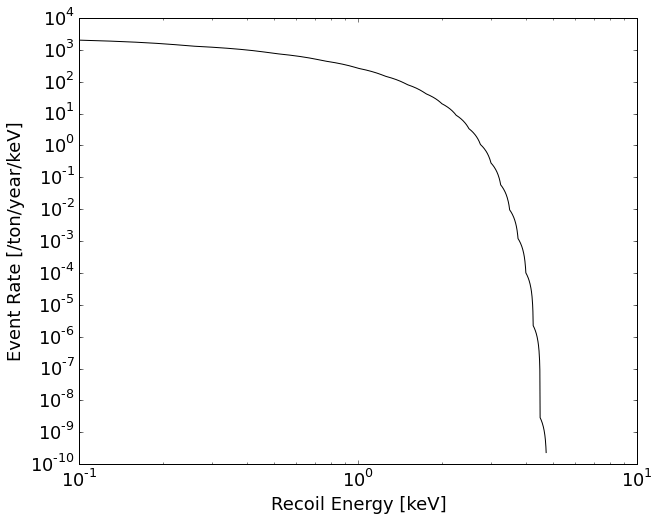

In [3]:
#setup (title to save figure, and file path to diff E spectrum , or list of energies)
title="8B" 
file_path='data/B8_DiffRate.txt' 
ParticleType='NR' # ER or NR

# Get S1 and S2 from an exmple PP solar neutrino differential spectrum
Nph, Ne, S1, S2, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=1e6, minSpikePE=0.2)

# Or use this to convert energy array into S1,S2 with energy_array=>your energy array
#Nph, Ne, S1, S2 = E2NphNe(Energy =energy_array, ParticleType=ParticleType)

#Generate Flat ER and NR spectra:
S1_bins, mean_S2oS1_flat_n, mean_S2oS1_e, stdev_S2oS1_e = genBands()

<h2> Make scatter plot in S2/S1 vs. S1 and calculate expected number of LZ WIMP like events</h2>

Total Simulated= 1e+06 
Nominal LZ exposoure factor 75.8 
Number below NR mean in WS region= 329 +/- 18
Number above NR mean in WS region= 2 +/- 1
LZ nominal exposure BG in S1 region= 4.367 +/- 0.240
LZ nominal exposure BG in WS region= 4.340 +/- 0.239


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


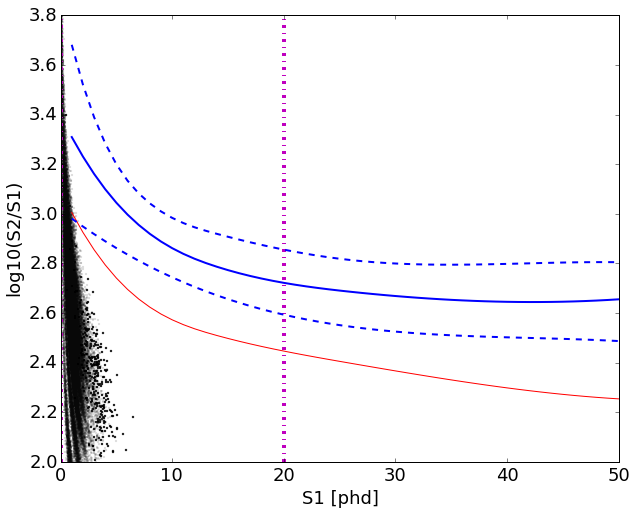

In [4]:
#plot WS region, and Calc expected count in WS region

#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=0
S1_max=20
Ne_min=5
NS1_coin_req=3

WS_cut=(inrange(S1,[S1_min,S1_max])) & (Ne>=Ne_min) & (NS1_coin>=NS1_coin_req)

plt.scatter(S1,log10(S2/S1),color='black',s=2,alpha=0.1)
plt.scatter(S1[WS_cut],log10(S2[WS_cut]/S1[WS_cut]),color='black',s=2,alpha=0.8)
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})
plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)

#plot NR mean, with a smooth spline, and calculate number of WS candidates
sNR = ip.UnivariateSpline(S1_bins, log10(mean_S2oS1_flat_n), s=.01)
WS_under_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])<=sNR(S1[WS_cut])) ) 
WS_above_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])>sNR(S1[WS_cut])) )

plot(S1_bins,sNR(S1_bins),'-r')

#plot ER band, with a smooth spline
s = ip.UnivariateSpline(S1_bins, mean_S2oS1_e, s=.01)
s_ub = ip.UnivariateSpline(S1_bins, mean_S2oS1_e+1.28*stdev_S2oS1_e, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bins, mean_S2oS1_e-1.28*stdev_S2oS1_e, s=.01)
plot(S1_bins,s(S1_bins),'-b',linewidth=2)
plot(S1_bins,s_ub(S1_bins),'--b',linewidth=2)
plot(S1_bins,s_lb(S1_bins),'--b',linewidth=2)


xlim([0,50])
ylim([2.0,3.8])
savefig('figs/'+title+'.pdf')
savefig('figs/'+title+'.png')


print('Total Simulated= {:.1g} '.format(size(S1)))
print('Nominal LZ exposoure factor {:.1f} '.format(LZ_exposure_factor))
print('Number below NR mean in WS region= {:.0f} +/- {:.0f}'.format(WS_under_NRmean, sqrt(WS_under_NRmean)))
print('Number above NR mean in WS region= {:.0f} +/- {:.0f}'.format(WS_above_NRmean, sqrt(WS_above_NRmean)))
print('LZ nominal exposure BG in S1 region= {:.3f} +/- {:.3f}'.format((WS_above_NRmean+WS_under_NRmean)/LZ_exposure_factor, sqrt(WS_above_NRmean+WS_under_NRmean)/LZ_exposure_factor))
print('LZ nominal exposure BG in WS region= {:.3f} +/- {:.3f}'.format(WS_under_NRmean/LZ_exposure_factor, sqrt(WS_under_NRmean)/LZ_exposure_factor))

In [ ]:
#make a denisty scatter plot
scatterColor(S1,log10(S2/S1))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})